[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/xuan-liang/Deep-Learning-Reading-Group/blob/main/Jan72020-Chapter4-jiazhen/4.4-notebook.ipynb)

In [1]:
import keras
keras.__version__

'2.4.3'

# Overfitting and underfitting

In all the examples we saw in the previous chapter -- movie review sentiment prediction, topic classification, and house price regression -- 
we could notice that the performance of our model on the held-out validation data would always peak after a few epochs and would then start 
degrading, i.e. our model would quickly start to _overfit_ to the training data. Overfitting happens in every single machine learning 
problem. Learning how to deal with overfitting is essential to mastering machine learning.

Let's review some of the most common regularization 
techniques, and let's apply them in practice to improve our movie classification model from  the previous chapter.

Note: in this notebook we will be using the IMDB test set as our validation set. It doesn't matter in this context.

Let's prepare the data using the code from Chapter 3, Section 5:

In [2]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

17465344/17464789 [==============================] - 1s 0us/step


# Fighting overfitting

## Reducing the network's size


The simplest way to prevent overfitting is to reduce the size of the model, i.e. the number of learnable parameters in the model (which is 
determined by the number of layers and the number of units per layer). 

In deep learning, the number of learnable parameters in a model is 
often referred to as the model's "capacity". 

Always keep this in mind: deep learning models tend to be good at fitting to the training data, but the real challenge 
is generalization, not fitting.

There is a compromise to be 
found between "too much capacity" and "not enough capacity".

Let's try this on our movie review classification network. Our original network was as such:

In [3]:
from keras import models
from keras import layers

original_model = models.Sequential()
##The sequential API allows you to create models layer-by-layer
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

Now let's try to replace it with this smaller network:

In [4]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

##dimensionality of the output space for each layer is different.


smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])


Here's a comparison of the validation losses of the original network and the smaller network. The dots are the validation loss values of 
the smaller network, and the crosses are the initial network (remember: a lower validation loss signals a better model).

In [5]:
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 2s 36ms/step - loss: 0.4487 - acc: 0.8310 - val_loss: 0.3375 - val_acc: 0.8818
Epoch 2/20
49/49 [==============================] - 1s 12ms/step - loss: 0.2616 - acc: 0.9094 - val_loss: 0.2854 - val_acc: 0.8894
Epoch 3/20
49/49 [==============================] - 1s 12ms/step - loss: 0.2050 - acc: 0.9261 - val_loss: 0.3025 - val_acc: 0.8770
Epoch 4/20
49/49 [==============================] - 1s 12ms/step - loss: 0.1705 - acc: 0.9402 - val_loss: 0.2909 - val_acc: 0.8855
Epoch 5/20
49/49 [==============================] - 1s 12ms/step - loss: 0.1466 - acc: 0.9490 - val_loss: 0.3133 - val_acc: 0.8781
Epoch 6/20
49/49 [==============================] - 1s 12ms/step - loss: 0.1303 - acc: 0.9548 - val_loss: 0.3253 - val_acc: 0.8784
Epoch 7/20
49/49 [==============================] - 1s 12ms/step - loss: 0.1115 - acc: 0.9620 - val_loss: 0.3715 - val_acc: 0.8676
Epoch 8/20
49/49 [==============================] - 1s 12ms/step - loss: 0.1003 - a

In [6]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 2s 42ms/step - loss: 0.5807 - acc: 0.7175 - val_loss: 0.5287 - val_acc: 0.8520
Epoch 2/20
49/49 [==============================] - 1s 11ms/step - loss: 0.4681 - acc: 0.8586 - val_loss: 0.4699 - val_acc: 0.8782
Epoch 3/20
49/49 [==============================] - 1s 12ms/step - loss: 0.4045 - acc: 0.9051 - val_loss: 0.4195 - val_acc: 0.8821
Epoch 4/20
49/49 [==============================] - 1s 12ms/step - loss: 0.3391 - acc: 0.9265 - val_loss: 0.3707 - val_acc: 0.8852
Epoch 5/20
49/49 [==============================] - 1s 12ms/step - loss: 0.2704 - acc: 0.9384 - val_loss: 0.3288 - val_acc: 0.8853
Epoch 6/20
49/49 [==============================] - 1s 11ms/step - loss: 0.2140 - acc: 0.9468 - val_loss: 0.3085 - val_acc: 0.8856
Epoch 7/20
49/49 [==============================] - 1s 12ms/step - loss: 0.1760 - acc: 0.9526 - val_loss: 0.3037 - val_acc: 0.8834
Epoch 8/20
49/49 [==============================] - 1s 12ms/step - loss: 0.1516 - a

In [7]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

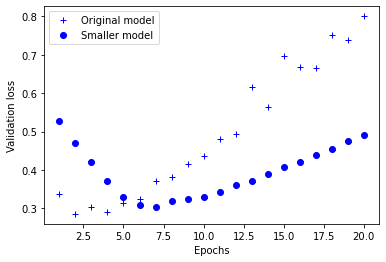

In [8]:
import matplotlib.pyplot as plt

# b+ is for "blue cross"
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
# "bo" is for "blue dot"
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()


As you can see, the smaller network starts overfitting later than the reference one (after 6 epochs rather than 4) and its performance 
degrades much more slowly once it starts overfitting.

Now, for kicks, let's add to this benchmark a network that has much more capacity, far more than the problem would warrant:

In [11]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(512, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

In [12]:
bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s - loss: 0.4539 - acc: 0.8011 - val_loss: 0.4150 - val_acc: 0.8229
Epoch 2/20
25000/25000 [==============================] - 3s - loss: 0.2148 - acc: 0.9151 - val_loss: 0.2742 - val_acc: 0.8901
Epoch 3/20
25000/25000 [==============================] - 3s - loss: 0.1217 - acc: 0.9544 - val_loss: 0.5442 - val_acc: 0.7975
Epoch 4/20
25000/25000 [==============================] - 3s - loss: 0.0552 - acc: 0.9835 - val_loss: 0.4316 - val_acc: 0.8842
Epoch 5/20
25000/25000 [==============================] - 3s - loss: 0.0662 - acc: 0.9888 - val_loss: 0.5098 - val_acc: 0.8822
Epoch 6/20
25000/25000 [==============================] - 3s - loss: 0.0017 - acc: 0.9998 - val_loss: 0.6867 - val_acc: 0.8811
Epoch 7/20
25000/25000 [==============================] - 3s - loss: 0.1019 - acc: 0.9882 - val_loss: 0.6737 - val_acc: 0.8800
Epoch 8/20
25000/25000 [==============================] - 3s 

Here's how the bigger network fares compared to the reference one. The dots are the validation loss values of the bigger network, and the 
crosses are the initial network.

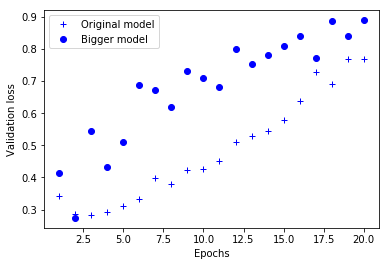

In [26]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()


The bigger network starts overfitting almost right away, after just one epoch, and overfits much more severely. Its validation loss is also 
more noisy.

Meanwhile, here are the training losses for our two networks:

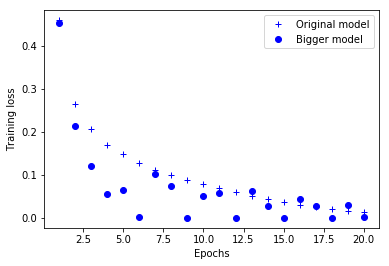

In [28]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

As you can see, the bigger network gets its training loss near zero very quickly. The more capacity the network has, the quicker it will be 
able to model the training data (resulting in a low training loss), but the more susceptible it is to overfitting (resulting in a large 
difference between the training and validation loss).

## Adding weight regularization


_Occam's Razor_ principle: given two explanations for something, the explanation most likely to be correct is the 
"simplest" one, the one that makes the least amount of assumptions. 

Given some 
training data and a network architecture, there are multiple sets of weights values (multiple _models_) that could explain the data, and 
simpler models are less likely to overfit than complex ones.

A "simple model" in this context is a model where the distribution of parameter values has less entropy (or a model with fewer 
parameters altogether). 

A common way to mitigate overfitting is to put constraints on the complexity 
of a network by forcing its weights to only take small values, which makes the distribution of weight values more "regular". This is called 
"weight regularization", and it is done by adding to the loss function of the network a _cost_ associated with having large weights. This 
cost comes in two flavors:

* L1 regularization, where the cost added is proportional to the _absolute value of the weights coefficients_.
* L2 regularization, where the cost added is proportional to the _square of the value of the weights coefficients_. L2 regularization is also called _weight decay_ in the context of neural networks.


In Keras, weight regularization is added by passing _weight regularizer instances_ to layers as keyword arguments. Let's add L2 weight 
regularization to our movie review classification network:

* <a href="https://keras.io/api/layers/regularizers/">Layer weight regularizers</a>

In [17]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

The L2 regularization penalty is computed as: 
\begin{align}
loss = l2 \times \sum x^2,
\end{align}
where $x$ is weight_coefficient_value.

Here, the penalty is $0.001 \sum x^2$.

In [18]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

Here's the impact of our L2 regularization penalty:

In [19]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s - loss: 0.4880 - acc: 0.8218 - val_loss: 0.3820 - val_acc: 0.8798
Epoch 2/20
25000/25000 [==============================] - 2s - loss: 0.3162 - acc: 0.9068 - val_loss: 0.3353 - val_acc: 0.8896
Epoch 3/20
25000/25000 [==============================] - 2s - loss: 0.2742 - acc: 0.9185 - val_loss: 0.3306 - val_acc: 0.8898
Epoch 4/20
25000/25000 [==============================] - 2s - loss: 0.2489 - acc: 0.9288 - val_loss: 0.3363 - val_acc: 0.8866
Epoch 5/20
25000/25000 [==============================] - 2s - loss: 0.2420 - acc: 0.9318 - val_loss: 0.3492 - val_acc: 0.8820
Epoch 6/20
25000/25000 [==============================] - 2s - loss: 0.2322 - acc: 0.9359 - val_loss: 0.3567 - val_acc: 0.8788
Epoch 7/20
25000/25000 [==============================] - 2s - loss: 0.2254 - acc: 0.9385 - val_loss: 0.3632 - val_acc: 0.8787
Epoch 8/20
25000/25000 [==============================] - 2s 

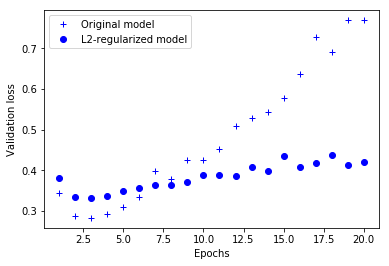

In [30]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()



As you can see, the model with L2 regularization (dots) has become much more resistant to overfitting than the reference model (crosses), 
even though both models have the same number of parameters.

As alternatives to L2 regularization, you could use one of the following Keras weight regularizers:

In [ ]:
from keras import regularizers

# L1 regularization
regularizers.l1(0.001)

# L1 and L2 regularization at the same time
regularizers.l1_l2(l1=0.001, l2=0.001)

## Adding dropout

Dropout, applied to a layer, consists of randomly "dropping out" (i.e. setting to zero) a number of 
output features of the layer during training. Let's say a given layer would normally have returned a vector `[0.2, 0.5, 1.3, 0.8, 1.1]` for a 
given input sample during training; after applying dropout, this vector will have a few zero entries distributed at random, e.g. `[0, 0.5, 1.3, 0, 1.1]`. 

The "dropout rate" is the fraction of the features that are being zeroed-out; it is usually set between 0.2 and 0.5. At test 
time, no units are dropped out, and instead the layer's output values are scaled down by a factor equal to the dropout rate, so as to 
balance for the fact that more units are active than at training time.

Consider a Numpy matrix containing the output of a layer, `layer_output`, of shape `(batch_size, features)`. At training time, we zero out at random a fraction of the values in the matrix:

```python
# At training time: we drop out 50% of the units in the output
layer_output *= np.randint(0, high=2, size=layer_output.shape)
##equivalent to layer_output = layer_output * np.randint(0, high=2, size=layer_output.shape)
```

* <a href="https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html">np.randint</a>


In [15]:
np.random.randint(low=0, high=2, size=10)
##Return random integers from the “discrete uniform” distribution of the specified dtype 
##in the “half-open” interval [low, high). If high is None (the default), then results are from [0, low).

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 0])


At test time, we would be scaling the output down by the dropout rate. Here we scale by 0.5 (because we were previous dropping half the 
units):

```python
# At test time:
layer_output *= 0.5
```


The core idea is that introducing noise in the output values of a layer can break up happenstance patterns that are not significant, which the network would start memorizing if no noise was present. 

In Keras you can introduce dropout in a network via the `Dropout` layer, which gets applied to the output of layer right before it, e.g.:
```python
model.add(layers.Dropout(0.5))
```

* <a href="https://keras.io/api/layers/regularization_layers/dropout/">layers.Dropout</a>


Let's add two `Dropout` layers in our IMDB network to see how well they do at reducing overfitting:

In [16]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

In [17]:
dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 52ms/step - loss: 0.5948 - acc: 0.6753 - val_loss: 0.4406 - val_acc: 0.8663
Epoch 2/20
49/49 [==============================] - 1s 13ms/step - loss: 0.4389 - acc: 0.8138 - val_loss: 0.3315 - val_acc: 0.8823
Epoch 3/20
49/49 [==============================] - 1s 12ms/step - loss: 0.3475 - acc: 0.8660 - val_loss: 0.2883 - val_acc: 0.8890
Epoch 4/20
49/49 [==============================] - 1s 13ms/step - loss: 0.2898 - acc: 0.8924 - val_loss: 0.2759 - val_acc: 0.8895
Epoch 5/20
49/49 [==============================] - 1s 13ms/step - loss: 0.2541 - acc: 0.9110 - val_loss: 0.2807 - val_acc: 0.8893
Epoch 6/20
49/49 [==============================] - 1s 13ms/step - loss: 0.2287 - acc: 0.9191 - val_loss: 0.3027 - val_acc: 0.8864
Epoch 7/20
49/49 [==============================] - 1s 13ms/step - loss: 0.2060 - acc: 0.9295 - val_loss: 0.3007 - val_acc: 0.8874
Epoch 8/20
49/49 [==============================] - 1s 13ms/step - loss: 0.1891 - a

Let's plot the results:

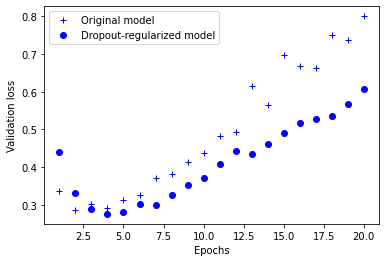

In [18]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()


Again, a clear improvement over the reference network.

To recap: here the most common ways to prevent overfitting in neural networks:

* Getting more training data.
* Reducing the capacity of the network.
* Adding weight regularization.
* Adding dropout.